In [2]:
# step one : import all files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# step 2 : creating a dataframe
data= pd.read_csv("Titanic-Dataset.csv")
df=pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: details about a DataFrame


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The Dataset contain 891 Passengers & 12 colomns


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Cabin'].value_counts()
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


Hear we can see that only 342 peoples out of 891 peoples travling in the Titanic are Survived

**Step 4: Data Cleaning**

  Before analysis, we must handle the missing values in the Dataset

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so here we can see that

there are 177 missing values(NULL) in Age ,687 in Cabin & 2 in Embarked are present

In [9]:
df[['Age','Cabin','Embarked']].head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


In [10]:
# now we have to remove this missing values in the table
# as Age is a numerical column, we can use the median to fill the NUll values using fillna() method
df['Age']=df['Age'].fillna(df['Age'].median())

# Cabin has a large number of missing values, so it's best to drop the column
""" but before removing the Cabin colomn we have to create a new colomn
which can store the values from Cabin colomn"""
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

df.drop('Cabin', axis=1, inplace=True)

# Embarked has only 2 missing values, so we can fill them with the mode
# mode is method that select the most frequently appered value in the column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

now we remove all Null values From the table(Datasett)

#### **Theoretical Concept: Univariate Analysis**

This is the simplest form of data analysis, where the data being analyzed contains only one variable. The main purpose is to describe the data and find patterns within it.
- **For Categorical Variables:** We use frequency tables, bar charts (`countplot`), or pie charts to see the count or proportion of each category.
- **For Numerical Variables:** We use histograms (`histplot`) or kernel density plots (`kdeplot`) to understand the distribution, and box plots (`boxplot`) to identify the central tendency, spread, and outliers.

Analyzing categorical features:


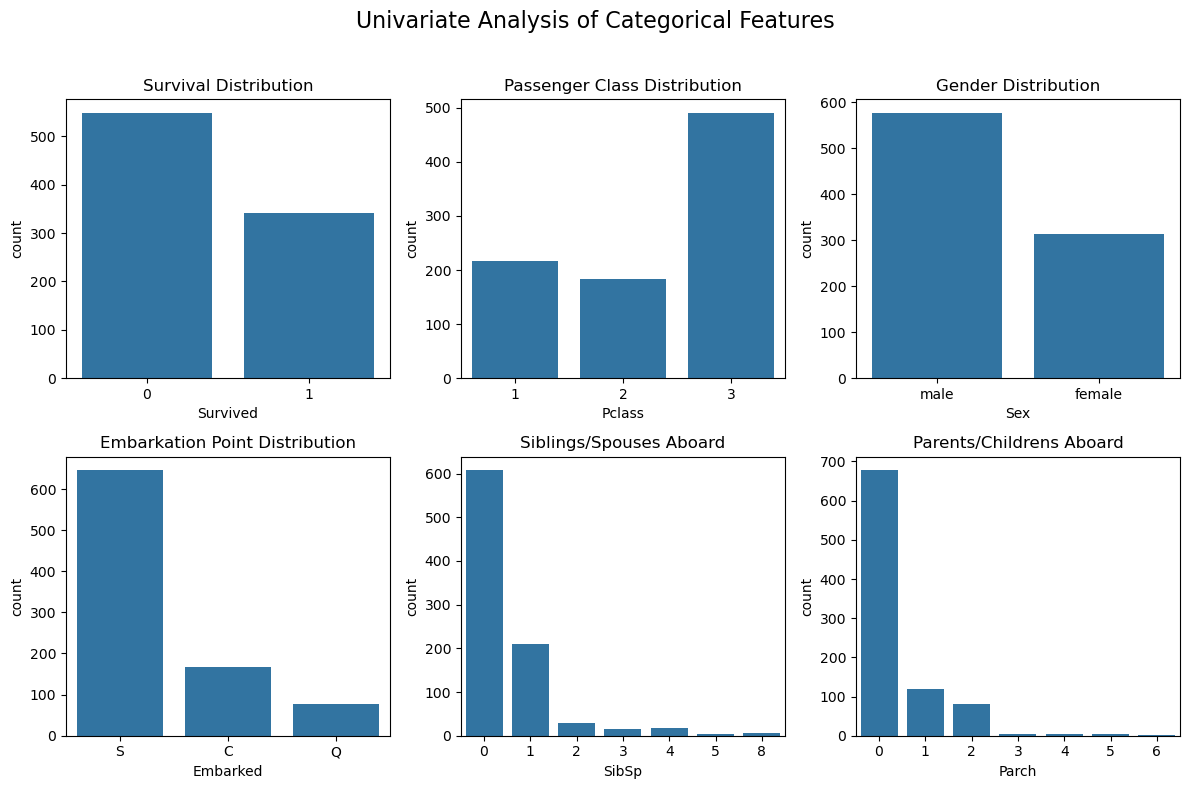

In [12]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(12,8))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')

sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Embarkation Point Distribution')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Childrens Aboard')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1.In Survival distribution You can See that there are more than 500 peoples are died in titanic catestrophy

2.In Passenger Class Distribution You can see that there are large no of bookings for 3rd class followed by 2nd & 1st class

3.On Ship there are greater no of males(550+) than females(300+)

4.almost 600 + passengers are embarked from port s

5.From subplot 5 & 6 we understood that most of peoples are travling alone on ship

Analyzing numerical features:


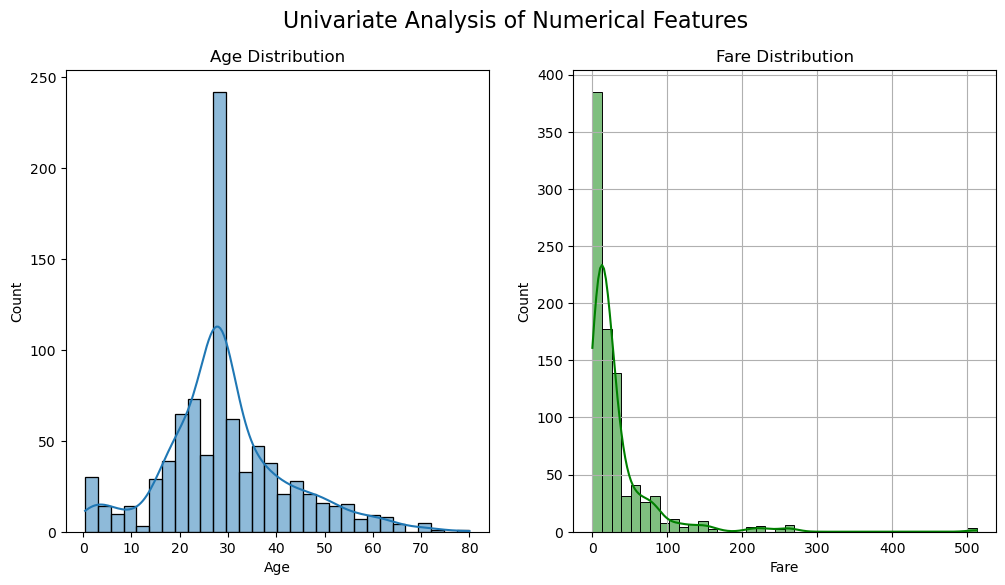

In [13]:
print("Analyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')
# Fare distribution
"""IN Fair Distribution we can see the ticket price paid by each passenger"""
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40,color='g').set_title('Fare Distribution')
plt.grid()
plt.show()

From Age Distribution graph : there are more adults as compair to childres & age group of above 40

From Fair Distribution graph : there are most of titanics tickets are chip some of exception

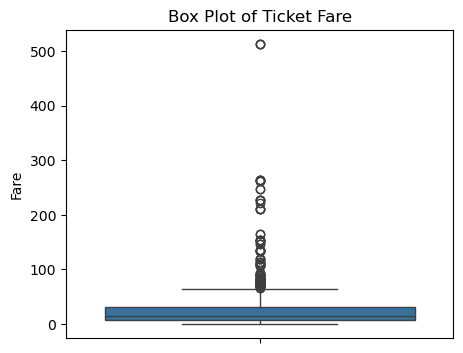

In [14]:
#Outliers for Fair Distribution
plt.figure(figsize=(5,4))
sns.boxplot(y='Fare',data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Step 5: Bivariate Analysis**

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, Survived.

Bivariate Analysis: Feature vs. Survival


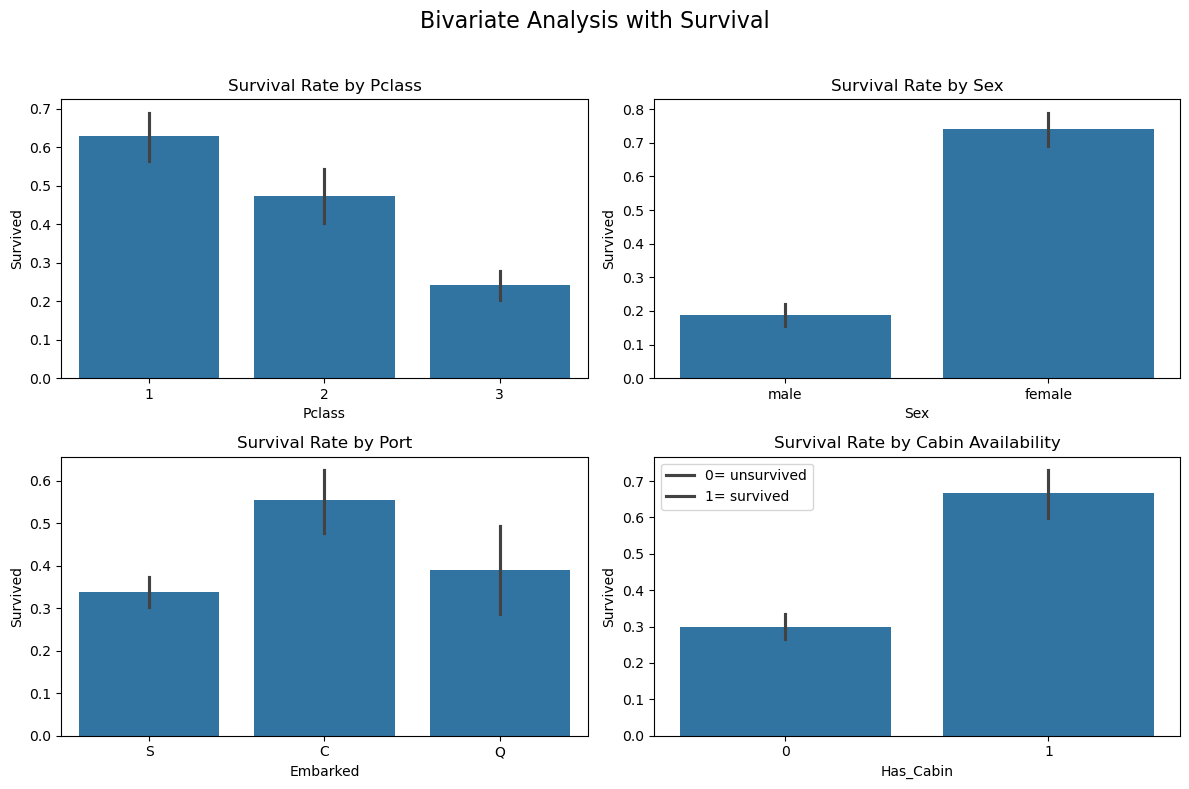

In [15]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')
# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')
plt.legend(['0= unsurvived','1= survived'])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Key Insights (Bivariate):



*   Pclass: A clear trend emerges: 1st class passengers had a >60%
*   survival rate, while 3rd class passengers had less than 25%.


*   Sex: This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
*   Embarked: Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.

*   Has_Cabin: Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

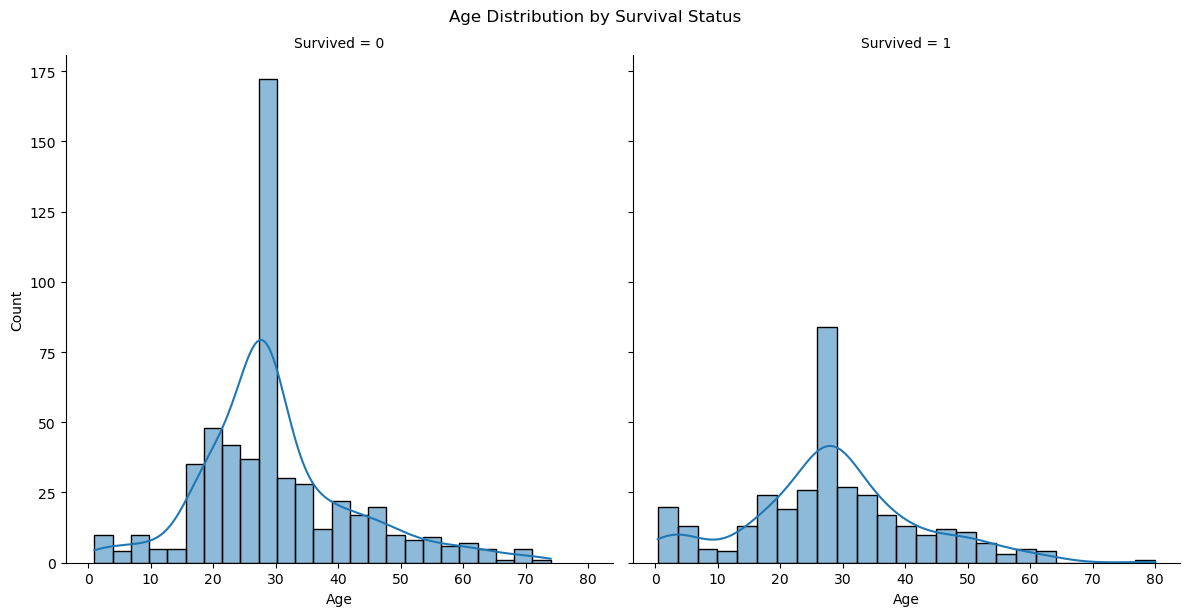

In [16]:
# Age vs. Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

* childrernce are survived more
* large no of Deaths are belongs age group of 20 to 40
* the passenger age above 70 are not survived

In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


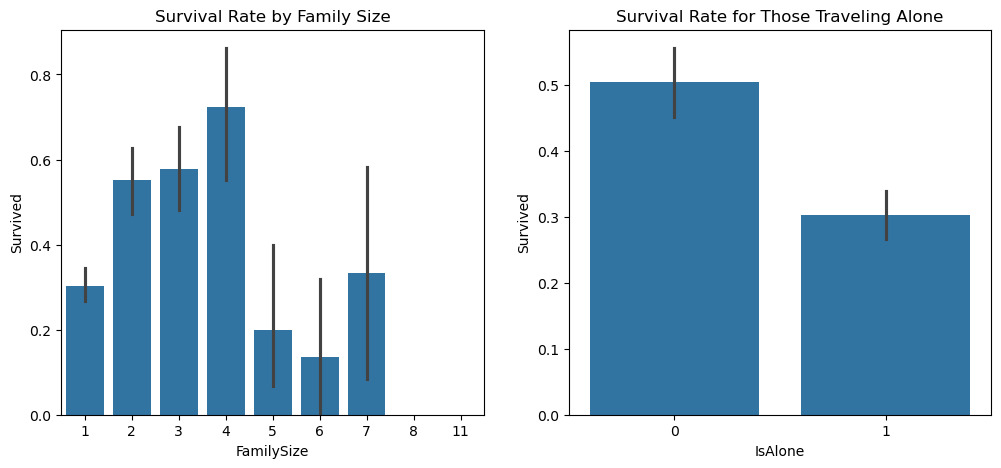

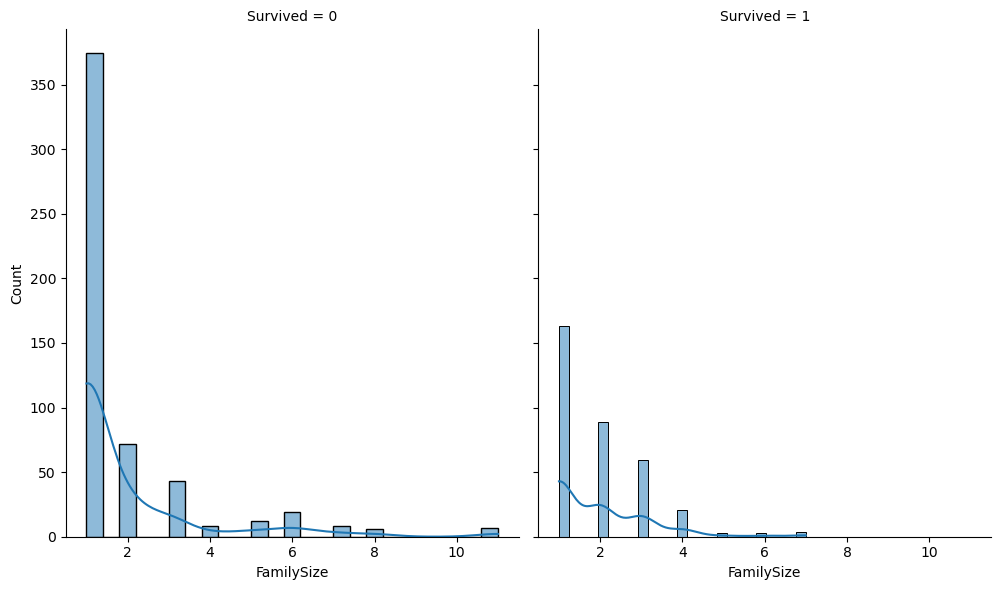

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')
print("\n")
print("\n")
g = sns.FacetGrid(df, col='Survived', height=6, aspect=0.8425)
g.map(sns.histplot, 'FamilySize', bins=25, kde=True)

plt.show()

**Step 7: Multivariate Analysis**

* Now we explore interactions between multiple variables simultaneously,including our new engineered features.

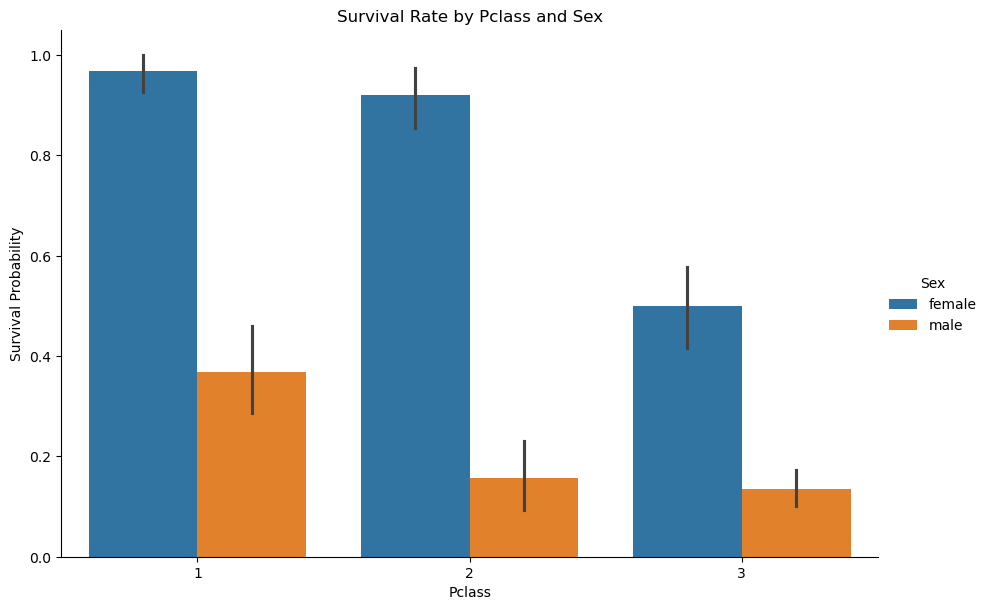

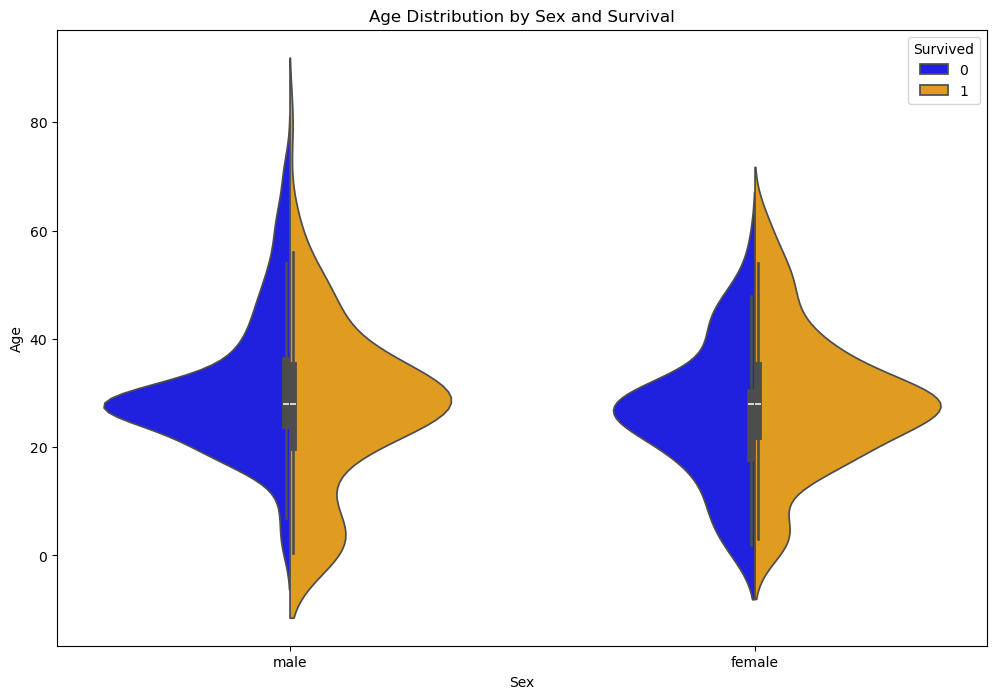

In [20]:


sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

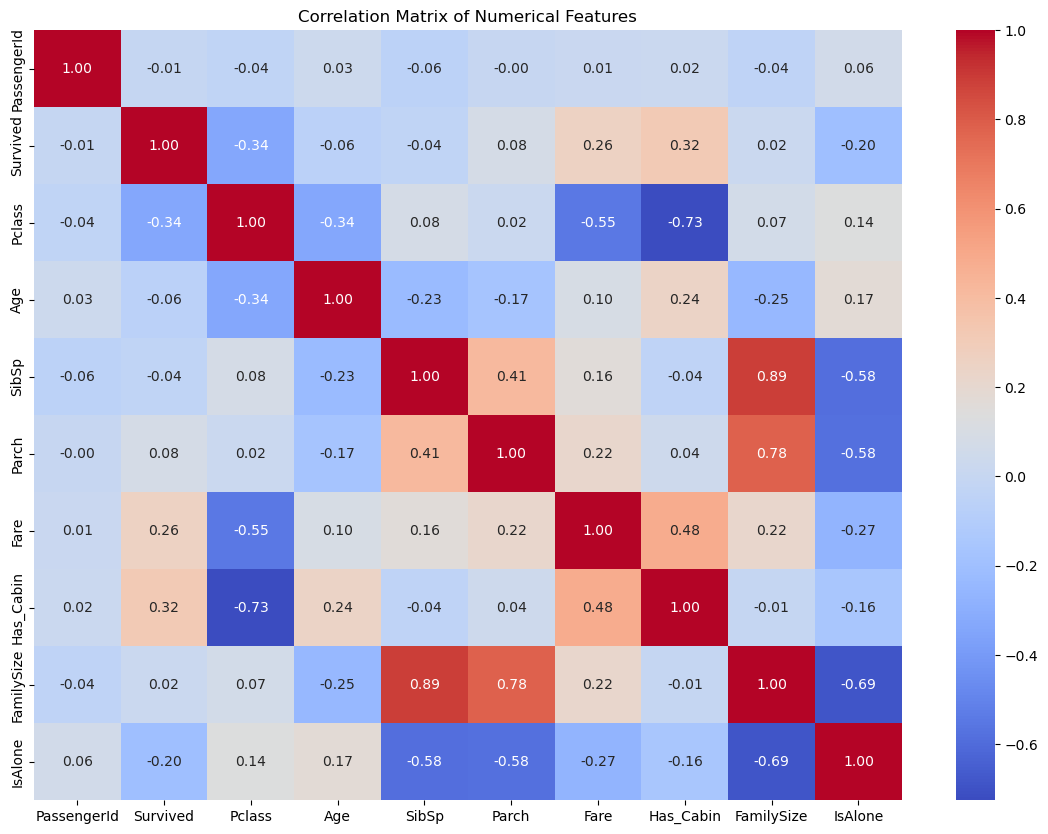

In [26]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()